In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
bikesharing=pd.read_csv(r"C:\Users\krish\Downloads\Bike sharing.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesharing.shape

(730, 16)

In [4]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
##Dropping unnecessary columns
##instant-as it is index column
##dteday -same imformation can be obtained from month and weekdays
##casual and registered -we have cnt column which gives the sum of casual and registered.

In [7]:
bikesharing.drop(['instant'],axis=1,inplace = True)


In [8]:
bikesharing.head(4)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562


In [9]:
bikesharing.drop(['dteday'],axis=1,inplace = True)

In [10]:
bikesharing.head(4)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562


In [11]:
bikesharing.drop(['casual'],axis=1,inplace = True)


In [12]:
bikesharing.head(4)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1454,1562


In [13]:
bikesharing.drop(['registered'],axis=1,inplace = True)

In [14]:
bikesharing.head(4)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562


In [15]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [16]:
#Converting season  mnth weekday weathersit in to categorical variable

bikesharing.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)


In [17]:
bikesharing.mnth.replace({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'August',9:'sept',10:'oct',11:'Nov',12:'Dec'},inplace=True)

In [18]:
bikesharing.weekday.replace({1:'Sun',2:'Mon',3:'Tue',4:'wed',5:'thur',6:'fri'},inplace=True)

In [19]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,wed,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,thur,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:


bikesharing.weathersit.replace({1:'clear',2:'mist',3:'light snow',4:'heavy rain'},inplace=True)


In [21]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,wed,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,thur,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

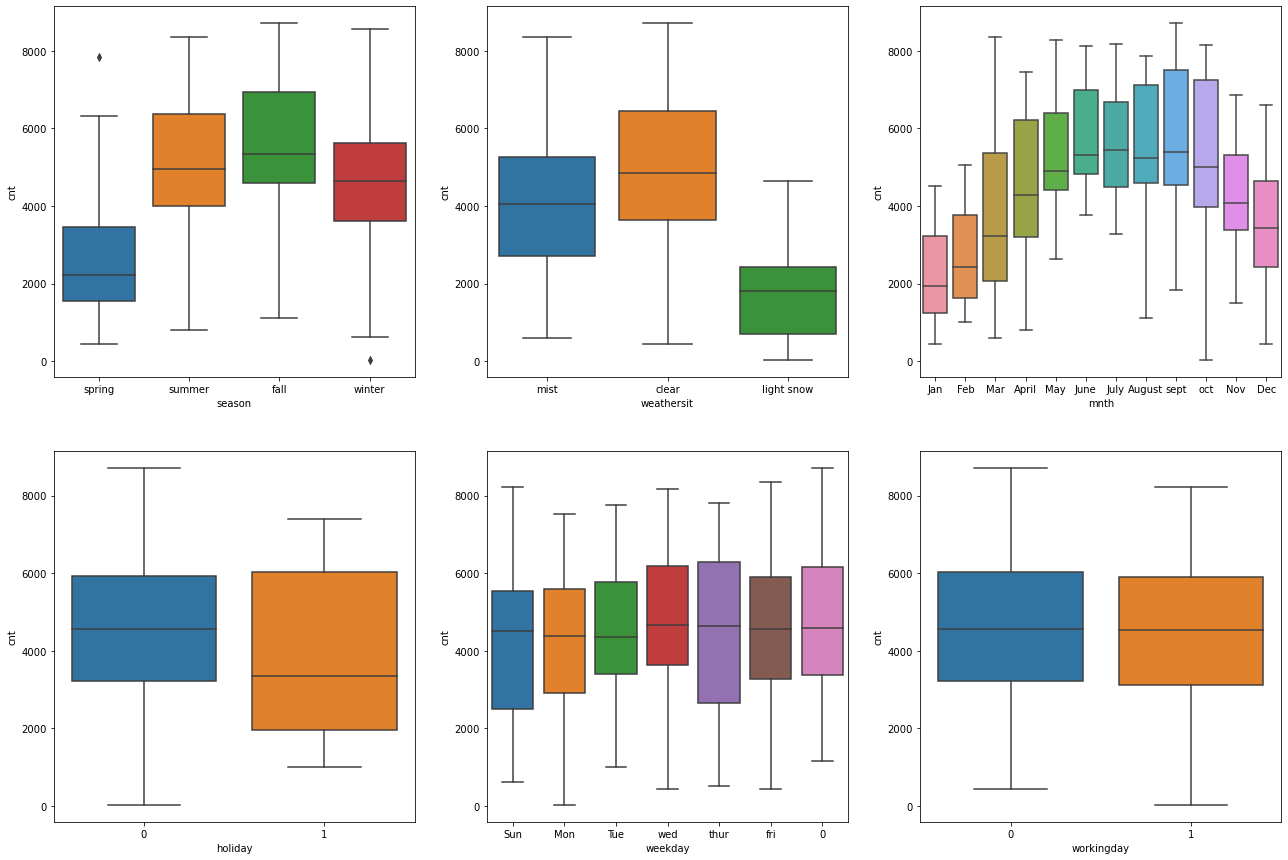

In [23]:
plt.figure(figsize=(22,15))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bikesharing)

plt.subplot(2,3,2)
sns.boxplot(x='weathersit',y='cnt',data=bikesharing)


plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikesharing)

plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikesharing)


plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data=bikesharing)

plt.subplot(2,3,6)
sns.boxplot(x='workingday',y='cnt',data=bikesharing)



# Insights

#### 1 Most of the bookings were happening on fall season followed by winter and summer    season.
#### 2 Most of bookings were happening when the weathersit is clear.
#### 3 In May to october bookings are more
#### 4 Booking for bikesharing is happening on working days when compared to holidays

<Figure size 1080x2160 with 0 Axes>

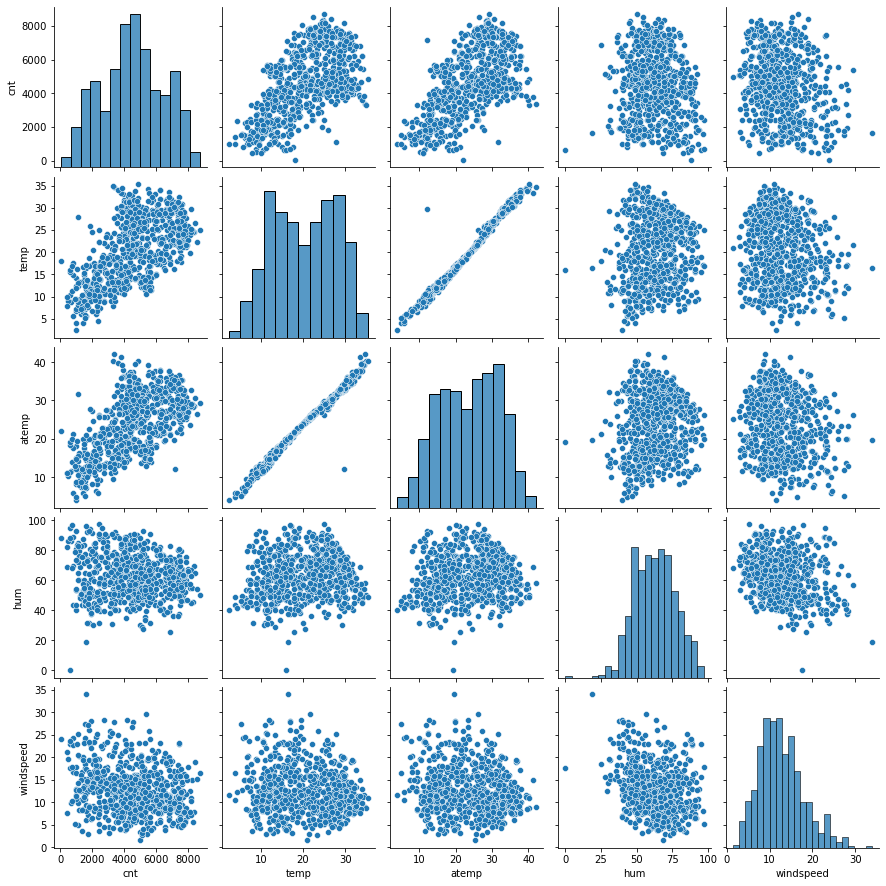

In [24]:
####Pairplot for continuous  numeric variables

plt.figure(figsize=(15,30))
sns.pairplot(data=bikesharing,vars=['cnt','temp','atemp','hum','windspeed'])
plt.show()

## Insights
##### temp and atemp are highly correlated.

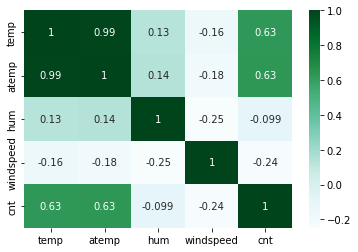

In [25]:
##Cheching correlation among variables



sns.heatmap(bikesharing[['temp','atemp','hum','windspeed','cnt']].corr(),cmap='BuGn',annot=True)
plt.show()

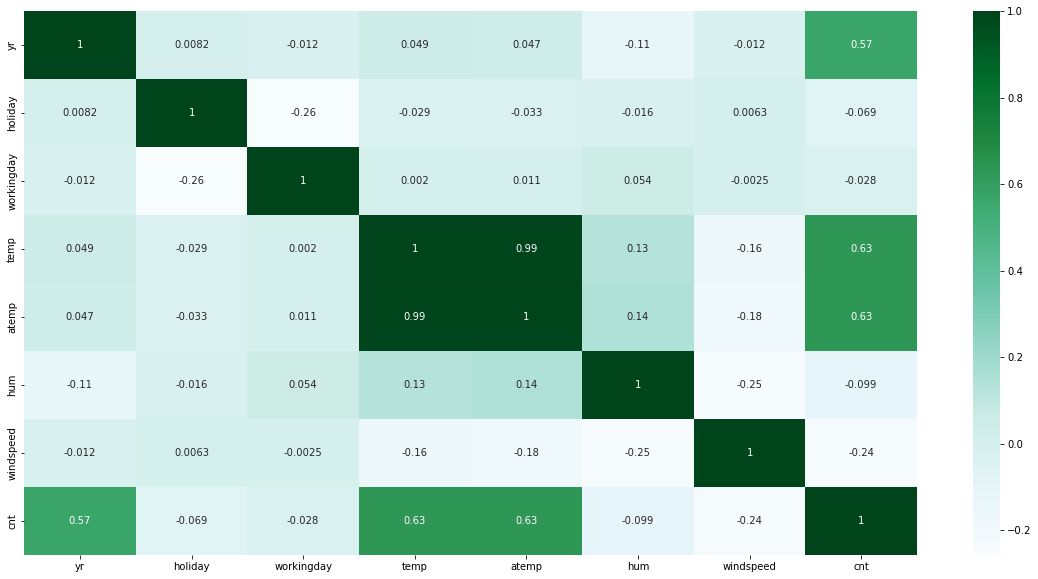

In [26]:
#Correlation among variables

corr=bikesharing.corr()
plt.figure(figsize=(20,10))

sns.heatmap(corr,annot=True,cmap='BuGn')
plt.show()

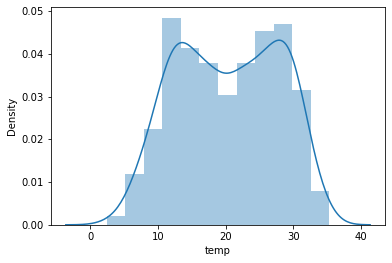

In [27]:
sns.distplot(bikesharing['temp'])
plt.show()

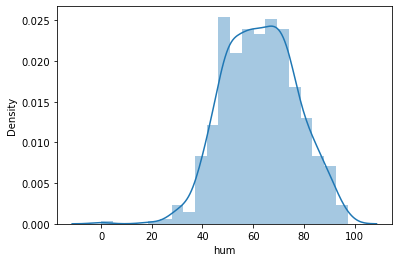

In [28]:
sns.distplot(bikesharing['hum'])
plt.show()

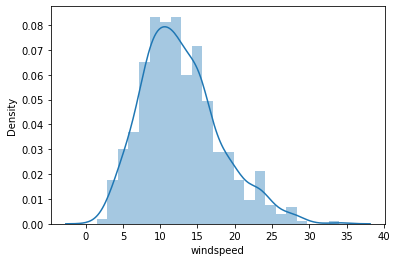

In [29]:
sns.distplot(bikesharing['windspeed'])
plt.show()

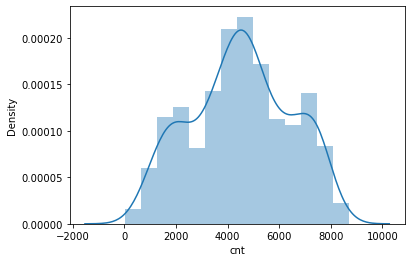

In [30]:
sns.distplot(bikesharing['cnt'])
plt.show()

## Datapreparation

In [31]:
#creating dummy variables for categorical variables
bikes_categorical = bikesharing.select_dtypes(include=['object'])
bikes_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sun,mist
1,spring,Jan,Mon,mist
2,spring,Jan,Tue,clear
3,spring,Jan,wed,clear
4,spring,Jan,thur,clear


In [32]:
##Convert into dummies
bikesharing_dummies = pd.get_dummies(bikes_categorical, drop_first=True)
bikesharing_dummies.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sun,weekday_Tue,weekday_fri,weekday_thur,weekday_wed,weathersit_light snow,weathersit_mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
# Drop categorical variable columns
bikesharing = bikesharing.drop(list(bikes_categorical.columns), axis=1)

In [34]:
# Concatenate dummy variables with X
bikesharing = pd.concat([bikesharing, bikesharing_dummies], axis=1)

In [35]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sun,weekday_Tue,weekday_fri,weekday_thur,weekday_wed,weathersit_light snow,weathersit_mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,0


## Model Building and Evaluation

In [36]:

# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
##Scaling
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [38]:
numeric_vars = ['temp','atemp','hum','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

In [39]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sun,weekday_Tue,weekday_fri,weekday_thur,weekday_wed,weathersit_light snow,weathersit_mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1


In [40]:

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_Mon,weekday_Sun,weekday_Tue,weekday_fri,weekday_thur,weekday_wed,weathersit_light snow,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.152941,0.154902,0.135294,0.129412,0.147059,0.143137,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.360284,0.362166,0.342373,0.335985,0.354512,0.350557,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Split the train dataset into X and y
y_train=df_train.pop('cnt')
x_train=df_train


### Building the first model with all the features

In [42]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(x_train, y_train)

LinearRegression()

In [43]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23093281 -0.13524543 -0.06087771  0.4002683   0.04641884 -0.15775725
 -0.18113655 -0.04409727  0.04175634  0.11048189  0.02303422 -0.04568547
 -0.03717729 -0.06345092 -0.0339118   0.0021444   0.00080507  0.02476497
 -0.04152963  0.00592207  0.08671987  0.02396637  0.02563925  0.03906052
 -0.00600179  0.05030733  0.05414825 -0.25090187 -0.05931088]
0.3444573552347035


### Model Building Using RFE

In [44]:
# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(x_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True False  True False  True  True  True  True  True False  True
 False  True  True False False False  True False  True False False False
 False False False  True  True]
[ 1  1  4  1  3  1  1  1  1  1 11  1  2  1  1 14 15 10  1 13  1  9  8  7
 12  6  5  1  1]


### Model Building and Evaluation

In [45]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = x_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
x_train_rfe1 = x_train[col1]

# Add a constant to the model
x_train_rfe1 = sm.add_constant(x_train_rfe1)
x_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_sept,weathersit_light snow,weathersit_mist
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [59]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, x_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 29 Aug 2022   Prob (F-statistic):          1.54e-188
Time:                        21:06:42   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [47]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.76
4,hum,1.93
12,mnth_Nov,1.76
10,mnth_Jan,1.68
15,weathersit_mist,1.57
9,mnth_Dec,1.49


In [50]:
#Eliminating season_spring
x_train_rfe1.drop('season_spring', axis = 1, inplace = True)

In [54]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe1.values, i) for i in range(x_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.75
3,temp,2.32
7,season_winter,2.08
4,hum,1.90
11,mnth_Nov,1.70
9,mnth_Jan,1.67
14,weathersit_mist,1.55
8,mnth_Dec,1.47
6,season_summer,1.44
10,mnth_July,1.43


### Residual Analysis

In [83]:
y_train_bike = lm1.predict(x_train_rfe1)

Text(0.5, 0, 'Errors')

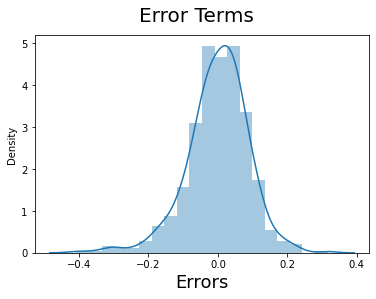

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_bike), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions

In [62]:
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

In [63]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
#Columns which rfe has selected
cols=x_train.columns[rfe1.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_sept', 'weathersit_light snow', 'weathersit_mist'],
      dtype='object')

In [65]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[cols]

In [67]:
# Let's now drop the variables we had manually eliminated as well
X_test_rfe2 = X_test_rfe2.drop(['season_spring'], axis = 1)

In [68]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   holiday                219 non-null    int64  
 3   temp                   219 non-null    float64
 4   hum                    219 non-null    float64
 5   windspeed              219 non-null    float64
 6   season_summer          219 non-null    uint8  
 7   season_winter          219 non-null    uint8  
 8   mnth_Dec               219 non-null    uint8  
 9   mnth_Jan               219 non-null    uint8  
 10  mnth_July              219 non-null    uint8  
 11  mnth_Nov               219 non-null    uint8  
 12  mnth_sept              219 non-null    uint8  
 13  weathersit_light snow  219 non-null    uint8  
 14  weathersit_mist        219 non-null    uint8  
dtypes: fl

In [71]:
# Making predictions
y_pred = lm1.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

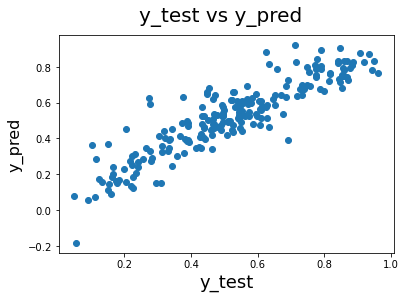

In [72]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

#### Model is doing well on test set .

In [73]:
# r2_score 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8086015607554498

## correlations between the final predictor variables

In [76]:
cols = cols.drop(['season_spring'])

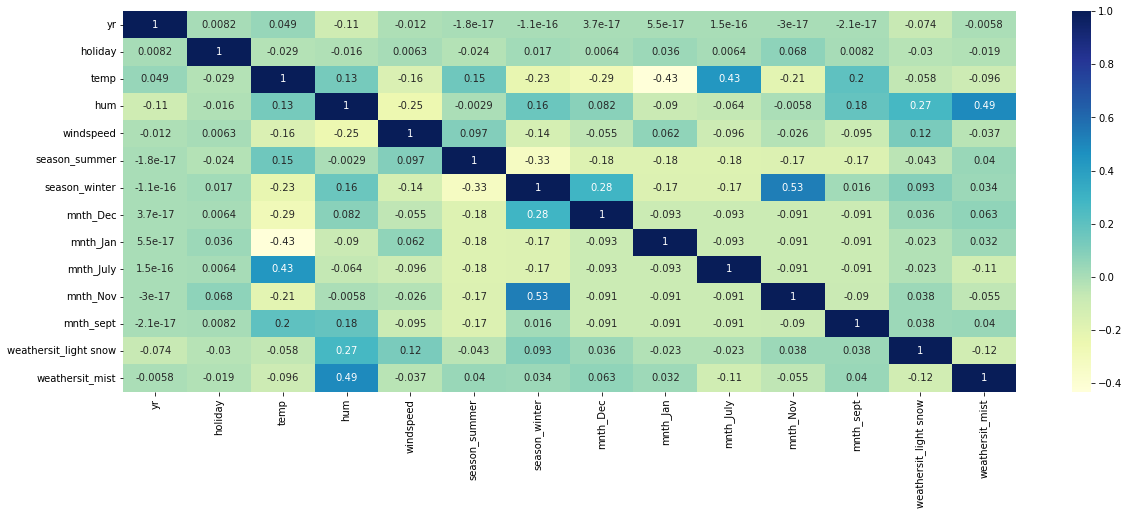

In [80]:
# Figure size
plt.figure(figsize=(20,7))

# Heatmap
sns.heatmap(bikesharing[cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

## Conclusion

### Important variables for predicting demand for bike sharing are:
   ###### 1 holiday
   ###### 2 temp
   ###### 3 hum
   ###### 4 windspeed
   ###### 5 season
   ###### 6 month
   ###### 7 weathersit
